#### Results

In this notebook we will walk through the results we obtained from the paper.

For each experiment we load the pretrained models and generate a grid that displays what the effect is of moving around in the latent space for a given sample.


In [1]:
# Import all the stuff that we use
import torch
from utils import *
import yaml
from yaml import Loader
from models.models_pl import Generic_model
from models.models_pl import *
from callbacks.generators import *
import torchvision
from IPython.display import Image 

In [2]:
def prepare_config(path_to_config):
    '''
    Prepares the config such that it can be used in this file
    
    '''
    
    config = yaml.load(open(path_to_config, "r"), Loader=Loader)
    config = to_vae_config(config)
    config['save_dir'] = './pretrained_models/'
    config = prepare_variables_pl(config)
    return config

def show_experiment_results(config):
    #Loading the encoder and decoder
    encoder, decoder = load_encoder_decoder(config)
    classifier = load_classifier(config)
    # Create model
    model = Generic_model(config, encoder, decoder, classifier, None).to(config['device'])
    train_loader, val_loader = select_dataloader(config)
    x_val = get_x_vals(val_loader, n_classes=config['number_of_classes'],
                   n_for_each_class=config['n_samples_each_class'])
    samples = create_samples(x_val, model)
    grids = create_latent_grids(samples, config["z_dim"])
    imgs = []
    for grid in grids:
        tensor = grid.cpu()
        img = torchvision.transforms.ToPILImage()(tensor)
        imgs.append(img)
        display(img)

### MNIST 3,8

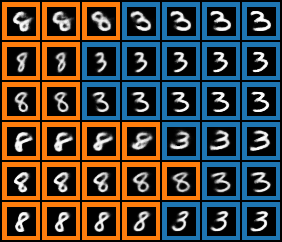

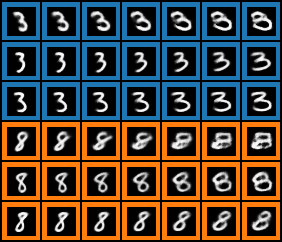

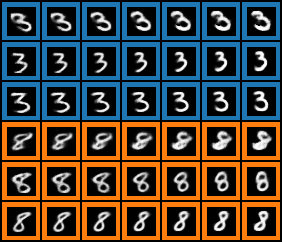

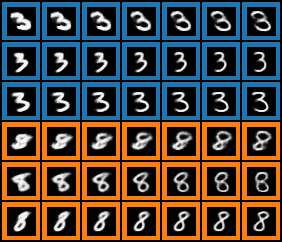

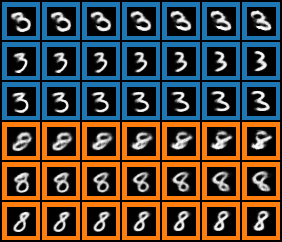

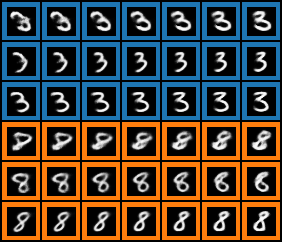

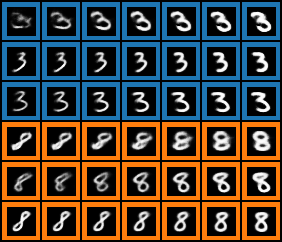

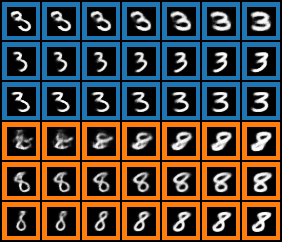

In [3]:
mnist_38_config_path = 'config/mnist_3_8_final.yml'
config = prepare_config(mnist_38_config_path)
show_experiment_results(config)

### Fashion MNIST 034

load .pt


C:\Users\gerso\projects\FACT\models\CNN_classifier_author.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_out = F.softmax(out)


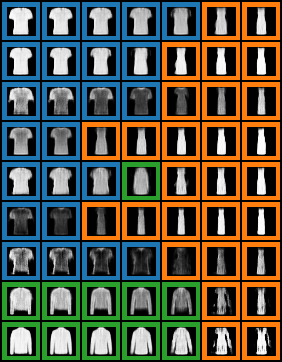

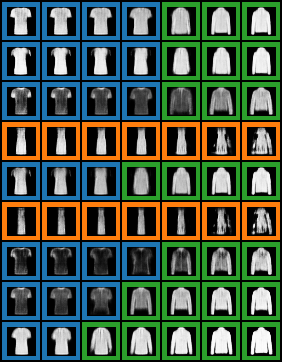

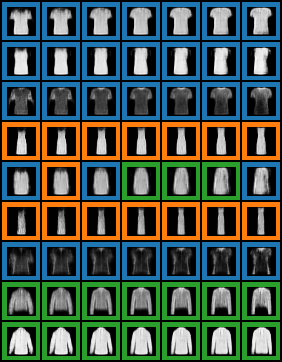

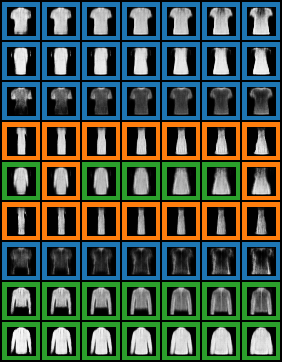

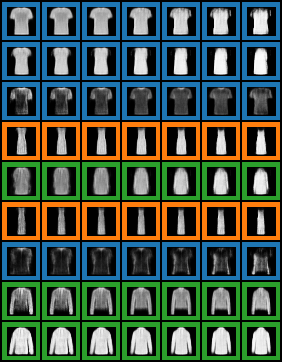

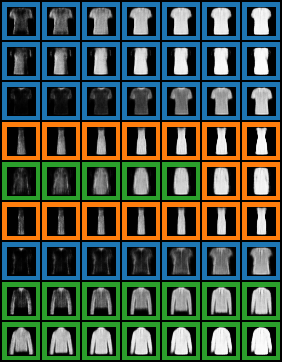

In [4]:
config_path = 'config/fmnist_0_3_4_final.yml'
config = prepare_config(config_path)
show_experiment_results(config)

### Dummy example

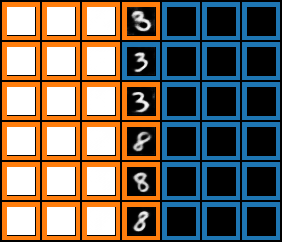

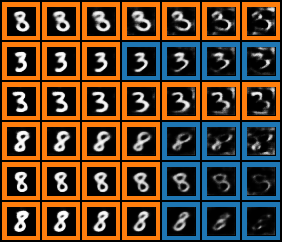

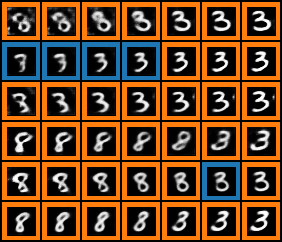

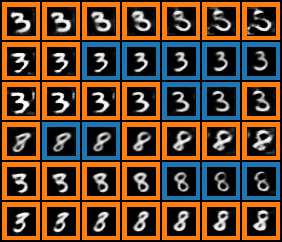

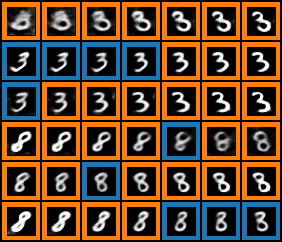

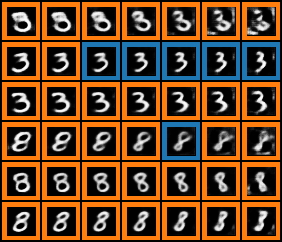

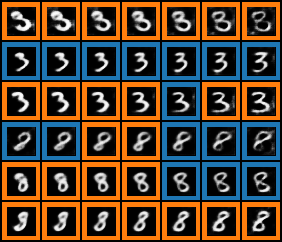

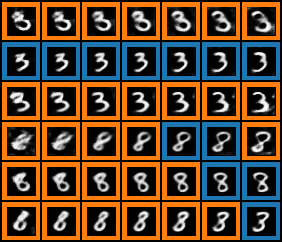

In [5]:
config_path = 'config/dummy.yml'
config = prepare_config(config_path)
show_experiment_results(config)